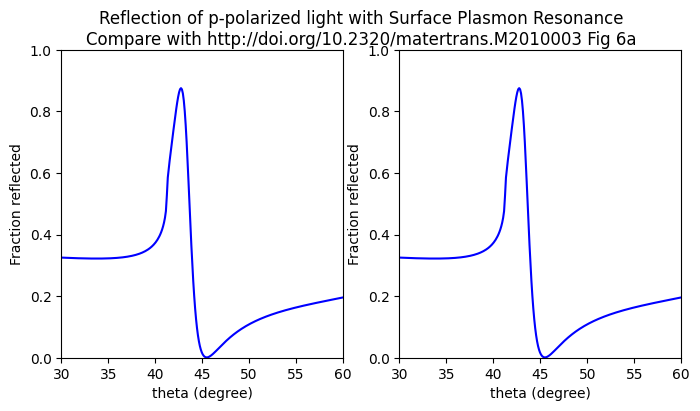

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## tmm
import tmm as tmm

"""
An example reflection plot with a surface plasmon resonance (SPR) dip.
Compare with http://doi.org/10.2320/matertrans.M2010003 ("Spectral and
Angular Responses of Surface Plasmon Resonance Based on the Kretschmann
Prism Configuration") Fig 6a
"""

polarization = "p"

# list of layer thicknesses in nm
d_list = [np.inf, 5, 30, np.inf]
# list of refractive indices
n_list = [1.517, 3.719 + 4.362j, 0.130 + 3.162j, 1]

S = 1
L = len(n_list)
W = 1

# wavelength in nm
lam_vac = 633
# list of angles to plot
theta_list = np.linspace(30 * np.pi / 180, 60 * np.pi / 180, num=300)
# initialize lists of y-values to plot
Rp = []
for theta in theta_list:
    Rp.append(tmm.coh_tmm(polarization, n_list, d_list, theta, lam_vac)["R"])

## tmm_fast
from tmm_fast import coh_tmm

n_list = torch.tensor(n_list, dtype=torch.complex128)
d_list = np.array(d_list)

N = torch.zeros(S, L, W, dtype=torch.complex128)
N[0, :, 0] = n_list

T = torch.Tensor(S, L)
T[0, :] = torch.tensor(d_list)

lambda_vacuum = torch.Tensor([lam_vac])
theta_incidence = torch.Tensor(theta_list)

tm = coh_tmm(polarization, N, T, theta_incidence, lambda_vacuum, device="cpu")

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(theta_list / np.pi * 180, Rp, "blue")
ax[1].plot(theta_list / np.pi * 180, np.array(tm["R"]).reshape(-1, 1), "blue")
for a in ax:
    a.set_xlabel("theta (degree)")
    a.set_ylabel("Fraction reflected")
    a.set_xlim(30, 60)
    a.set_ylim(0, 1)
plt.suptitle(
    "Reflection of p-polarized light with Surface Plasmon Resonance\n"
    "Compare with http://doi.org/10.2320/matertrans.M2010003 Fig 6a"
)
plt.show()